# (2.5) Generating random walks
20220160 Jungeun Kim, Dept. of Physics, KAIST

(Sethna, "Entropy, Order Parameters, and Complexity", 2nd edition, ex. 2.10)

One can efficiently generate and analyze random walks on the computer.

<br/>

## (a) 
Write a routine to generate an N-step random walk in d dimensions, with each step uniformly distributed in the range $(−1/2, 1/2)$ in each dimension. (Generate the steps first as an $N \times d$ array, then do a cumulative sum.) Plot $x_t$ versus $t$ for a few $10,000$-step random walks. Plot $x$ versus $y$ for a few two-dimensional random walks, with $N = 10$, $1,000$, and $100,000$. (Try to keep the aspect ratio of the $XY$ plot equal to one.) Does multiplying the number of steps by one hundred roughly increase the net distance by ten?

### (a-1) Basic package

In [121]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import numpy as np
import sys
%matplotlib widget

# Print numpy array without truncation
np.set_printoptions(threshold=sys.maxsize)

### (a-2) `random_walk(N, dim)`
Generate a random walk function with `N`-steps in `dim`-dimension, return $N \times d$ maatrix.

In [189]:
def random_walk(N, dim) :
    arr_random_walk = np.zeros((1, dim))     # Generate (1)-by-(dim) matrix filled with zero; initial position

    for n in range(1, N+1) :
        # Get an array of displacements. Its size is (1)-by-(dim). The displacement is randomly chose with uniform distribution (-1/2, 1/2).
        temp_random_walk = np.array([np.random.uniform(low=-0.5, high=0.5) for d in range(dim)])
        
        # Within the number of steps, append new position.
        arr_random_walk = np.append(arr_random_walk, [arr_random_walk[-1] + temp_random_walk], axis=0)
    
    return arr_random_walk

### (a-3) `many_random_walk(N, dim, num_point)`

Get an array of end-points by repeating the random walk with `N`-steps in `dim`-dimension, for `num_point` times.

In [139]:
def many_random_walk(N, dim, num_point) :
    arr_many_random_walk = np.array([random_walk(N, dim)[-1] for num in range(num_point)])  # Get a last point from each random walk.
    return arr_many_random_walk

### (a-4) `plot_1D_random_walk(arr_random_walk, overlap)`

Make a function to plot the specific 1-dimension random walks.
* `arr_random_walk`: $N \times 1$ array, output from `random_walk(N, dim=1, num_point)`
* `overlap`: boolean, whether overlap with the previous figure or not.

In [146]:
def plot_1D_random_walk(arr_random_walk, overlap) : 
    # x, y coordinate from the given array(random_xy)
    arr_x = arr_random_walk.T[0]   # Transpose
    N = len(arr_x)
    dim = len(arr_random_walk[0])
    t = np.arange(N)
    print(arr_x)

    if overlap == False :
        plt.figure(figsize=(8, 4))   


    # Use only integer as a x-axix ticker
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


    plt.title(r'Random walk in 1D as a function of time ($N={}$)'.format(N))
    plt.xlabel(r'$t$')
    plt.ylabel(r"x(t)")

    plt.scatter(t, arr_x, marker='.')
    plt.show()
    

<class 'numpy.ndarray'>


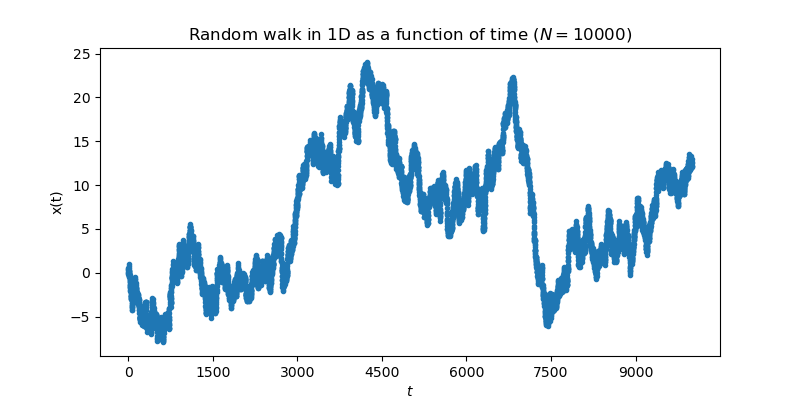

In [147]:
N = 10000
dim = 1

arr_random_walk = random_walk(N, dim=1)
plot_1D_random_walk(arr_random_walk, overlap=False)

### (a-5) `plot_2D_random_walk(arr_random_walk, overlap)`

In [202]:
def plot_2D_random_walk(arr_random_walk, overlap) : 
    # x, y coordinate from the given array(random_xy)
    arr_x, arr_y = arr_random_walk.T   # Transpose
    N = len(arr_x)
    dim = 2

    if overlap == False :
        plt.figure(figsize=(8,6))

    # Move left y-ax1is and bottom x-ax1is to pass through (0,0). Remove top and right ax1is.
    plt.gca().spines['left'].set_position('zero')
    plt.gca().spines['bottom'].set_position('zero')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Set the scale of both ax1is to be same.
    plt.gca().set_aspect('equal')

    # Get a maximum length from the origin.
    max_distance = int(np.sqrt(max(abs(arr_x))**2 + max(abs(arr_y))**2))

    # Span the range within the number of array
    plt.xlim([-max_distance-1, max_distance+1])
    plt.ylim([-max_distance-1, max_distance+1])

    # Use only integer as a axix ticker
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    # plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
    # plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

    # Add grid
    plt.grid(which='both')

    plt.title(r'2D Random walk ($N={}$, $d={}$)'.format(N-1, dim))

    plt.plot(arr_x, arr_y, marker='.', label="N$=${}".format(N-1))
    plt.legend()
    plt.show()
    

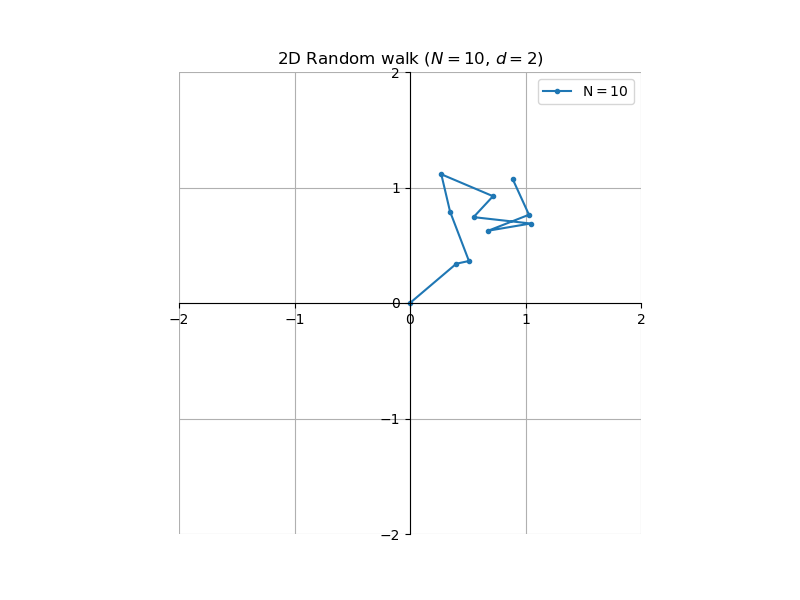

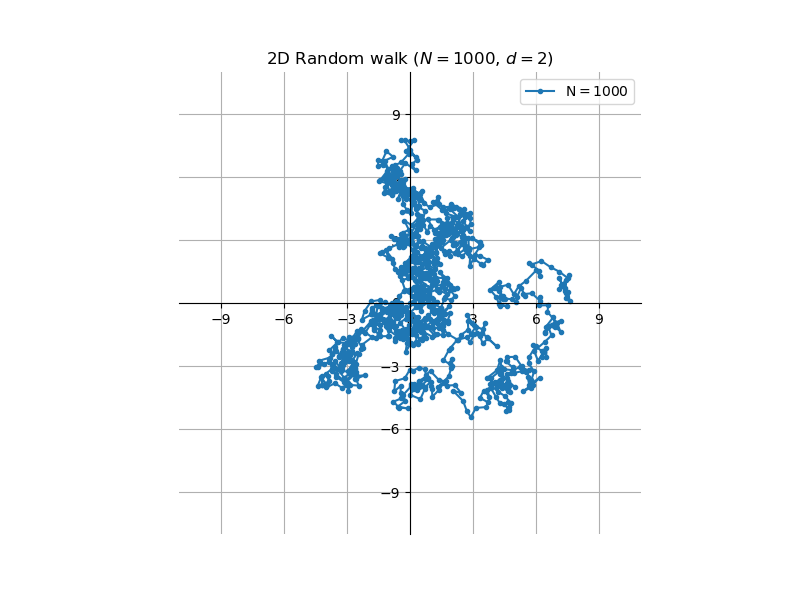

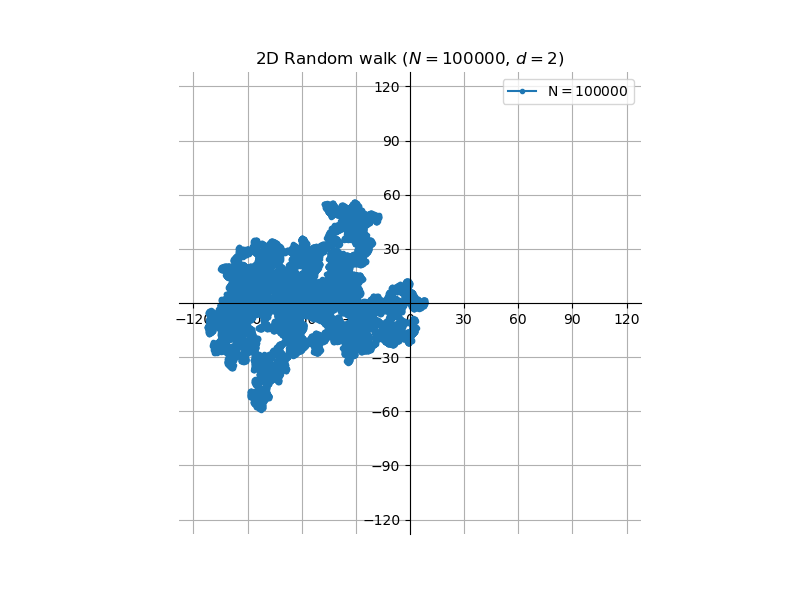

In [204]:
plot_2D_random_walk(random_walk(N=10, dim=2), overlap=False)
plot_2D_random_walk(random_walk(N=1000, dim=2), overlap=False)
plot_2D_random_walk(random_walk(N=100000, dim=2), overlap=False)

### (a-6) `plot_many_random_walk(N, arr_many_random_walk, overlap)`

Make a function to plot the end-point of different random walks.
* `N`: integer, number of steps
* `dim`: integer, dimension of the space
* `arr_many_random_walk`: $N \times d$ array, output from `many_random_walk(N, dim, num_point)`
* `overlap`: boolean, whether overlap with the previous figure or not.

In [195]:
def plot_many_random_walk(N, arr_many_random_walk, overlap) : 
    # x, y coordinate from the given array(random_xy)
    arr_x, arr_y = arr_many_random_walk.T   # Transpose
    num_point = len(arr_many_random_walk)
    dim = len(arr_many_random_walk[0])

    if overlap == False :
        plt.figure(figsize=(8,6))

    # Move left y-ax1is and bottom x-ax1is to pass through (0,0). Remove top and right ax1is.
    plt.gca().spines['left'].set_position('zero')
    plt.gca().spines['bottom'].set_position('zero')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)

    # Set the scale of both ax1is to be same.
    plt.gca().set_aspect('equal')

    # Get a maximum length from the origin.
    max_distance = int(np.sqrt(max(abs(arr_x))**2 + max(abs(arr_y))**2))

    # Span the range within the number of array
    plt.xlim([-max_distance-1, max_distance+1])
    plt.ylim([-max_distance-1, max_distance+1])

    # Use only integer as a axix ticker
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    # plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
    # plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

    # Add grid
    plt.grid(which='both')

    plt.title(r'Random walk (Number of points$=${}, $d={}$)'.format(num_point, dim))

    plt.scatter(arr_x, arr_y, marker='.', label="N$=${}".format(N))
    plt.legend()
    plt.show()
    

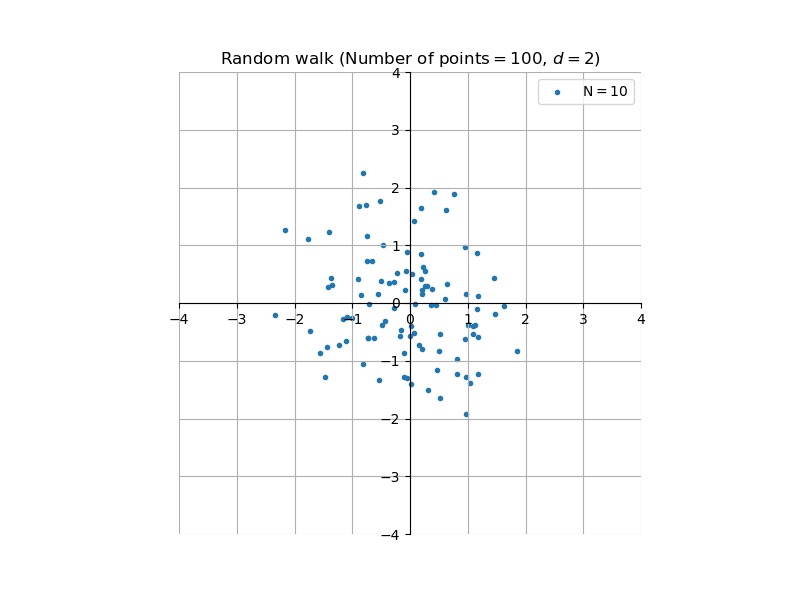

In [197]:
N = 10
dim = 2
num_point = 100

arr_many_random_walk = many_random_walk(N, dim, num_point)
plot_many_random_walk(N, arr_many_random_walk, overlap=False)


In [181]:
arr_many_random_walk_N_100000 = many_random_walk(N=100000, dim=2, num_point=1000)
print("checkpoint 1")
arr_many_random_walk_N_1000 = many_random_walk(N=1000, dim=2, num_point=1000)
print("checkpoint 2")
arr_many_random_walk_N_10 = many_random_walk(N=10, dim=2, num_point=1000)
print("checkpoint 3")

checkpoint 1
checkpoint 2
checkpoint 3


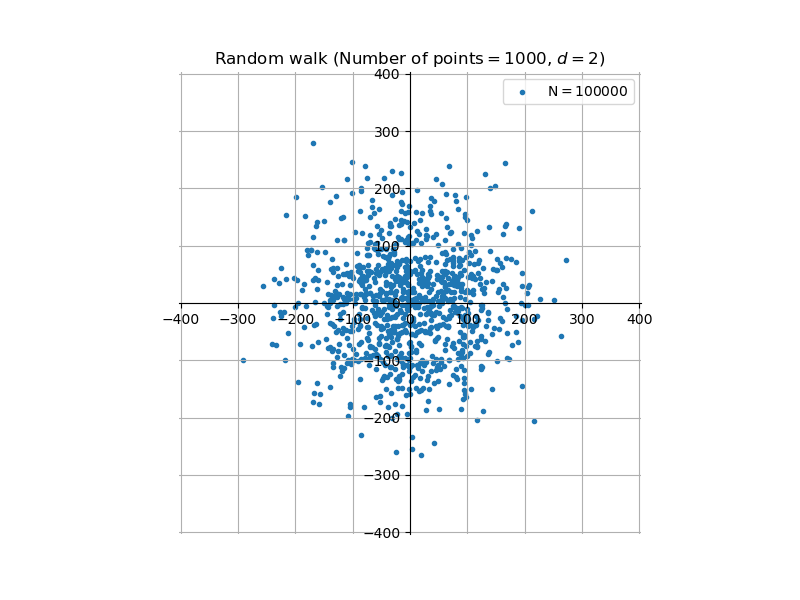

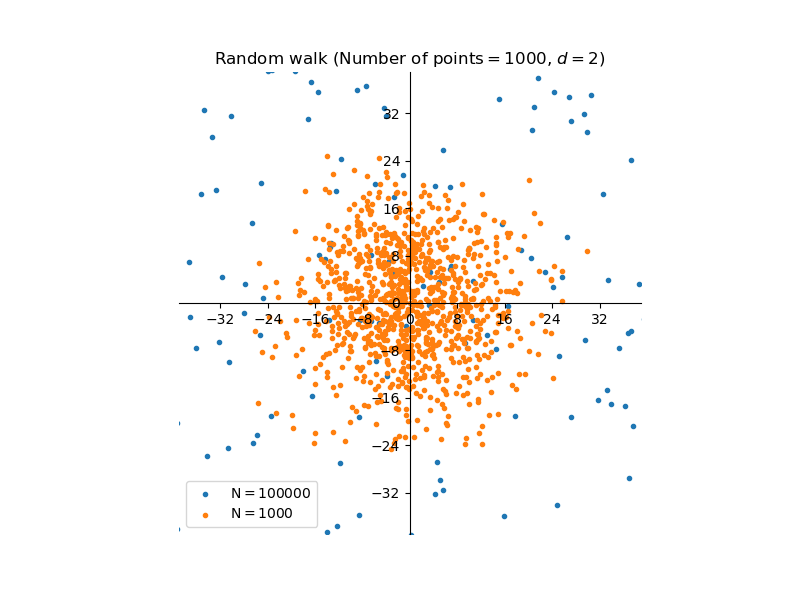

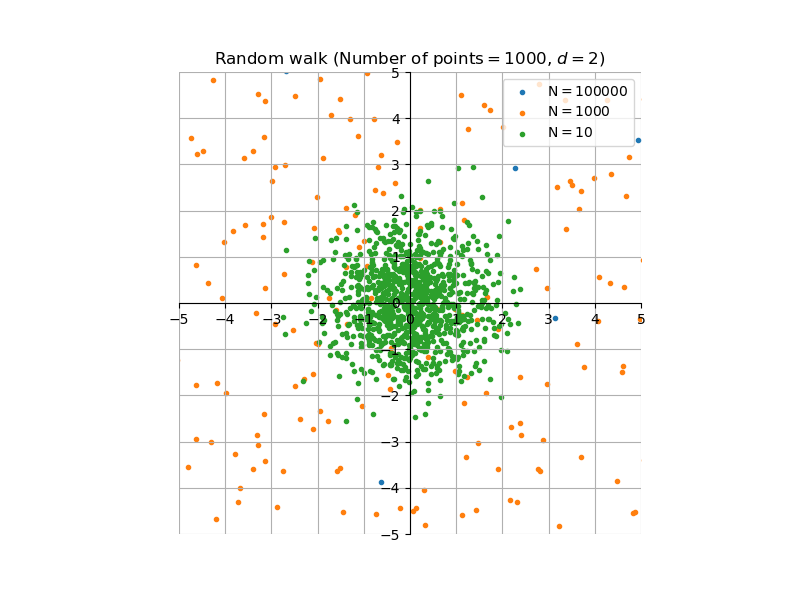

(-300.0, 300.0)

In [196]:
plot_many_random_walk(100000, arr_many_random_walk_N_100000, overlap=False)
plot_many_random_walk(1000, arr_many_random_walk_N_1000, overlap=True)
plot_many_random_walk(10, arr_many_random_walk_N_10, overlap=True)
plt.xlim([-300, 300])
plt.ylim([-300, 300])

Each random walk is different and unpredictable, but the ensemble of random walks has elegant, predictable properties.

# (b) 
Write a routine to calculate the endpoints of $W$ random walks with N steps each in $d$-dimensions. Do a scatter plot of the endpoints of 10,000 random walks with $N = 1$ and $10$, superimposed on the same plot. Notice that the longer random walks are distributed in a circularly symmetric pattern, even though the single step random walk $N = 1$ has a square probability distribution (Fig. 2.10).
This is an emergent symmetry; even though the walker steps longer distances along the diagonals of a square, a random walk several steps long has nearly perfect rotational symmetry.

### (b-1) Plot

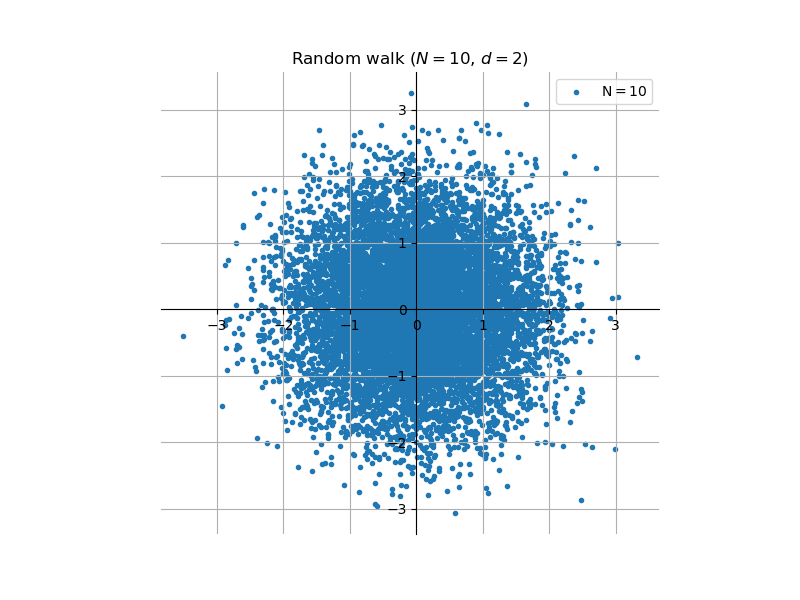

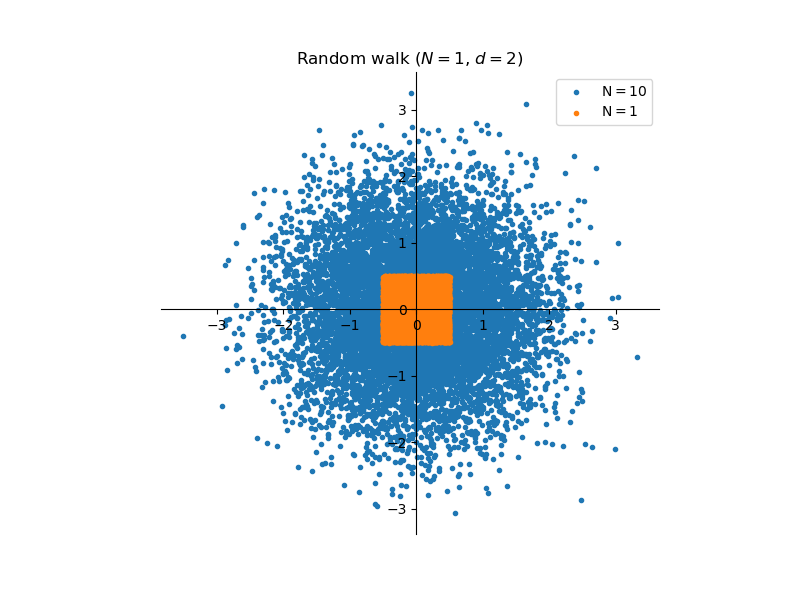

In [190]:
plot_many_random_walk(N=10, arr_many_random_walk=many_random_walk(N=10, dim=2, num_point=10000), overlap=False)
plot_many_random_walk(N=1, arr_many_random_walk=many_random_walk(N=1, dim=2, num_point=10000), overlap=True)

The most useful property of random walks is the central limit theorem. The endpoints of an ensemble of N step one-dimensional random walks with RMS step-size a has a Gaussian or normal probability distribution as $N \rightarrow \infty$,
$$ \rho(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp(-x^2 / 2 \sigma^2) , \tag{2.35}$$
with $\sigma = \sqrt{N} a$.

## (c) 
Calculate the RMS step-size a for one-dimensional steps uniformly distributed in (−1/2, 1/2). Write a routine that plots a histogram of the endpoints of $W$ one-dimensional random walks with $N$ steps and 50 bins, along with the prediction of eqn 2.35, for $x$ in $(−3\sigma, 3\sigma)$. Do a histogram with $W = 10,000$ and $N = 1$, $2$, $3$, and $5$. How quickly does the Gaussian distribution become a good approximation to the random walk?

<br/>

### (c-1) `calculate_1D_rms(arr_many_random_walk)`

In [207]:
def calculate_1D_rms(arr_random_walk) :
    arr_x = arr_random_walk.T[0]
    return np.sqrt(np.mean(arr_x**2))   # return rms distance.


### (c-2) `get_rms_many_1d_random_walk(num_point)`
* `N`: integer, number of steps
* `dim`: integer, dimension of the space
* `num_point`: integer, same as $W$.

In [208]:
def get_rms_many_1d_random_walk(N, dim, num_point) :
    distribution = []
    for W in range(num_point) :                             # Repeat for num_point(=W) times.
        distribution.append(calculate_1D_rms(random_walk(N, dim)))  # Append the rms distance.
    return np.array(distribution)

### (c-2) `plot_many_1D_random_walk_histogram(N, arr_many_random_walk, overlap)`

In [214]:
def plot_1D_rms_histogram(distribution) :
    plt.figure(figsize=(8,6))

    plt.hist(distribution, bins=50, density=True, label='Histogram')            # Normalized histogram

    stdev = np.std(distribution)
    x = np.arange(-3 * stdev, 3 * stdev, stdev/100)                             # x range, from -3 sigma to 3 sigma.
    Gaussian = np.exp(- x**2 / (2 * stdev**2)) / (np.sqrt(2 * np.pi) * stdev)   # Gaussian distribution
    plt.plot(x, Gaussian, 'r', label='Gaussian distribution')

    plt.title(r'1D rms length distribution (Number of points $W=10000$, $N={}$), $d=1$'.format(N))
    plt.legend()
    plt.xlabel(r'RMS length')
    plt.ylabel("Counts")
    plt.plot()

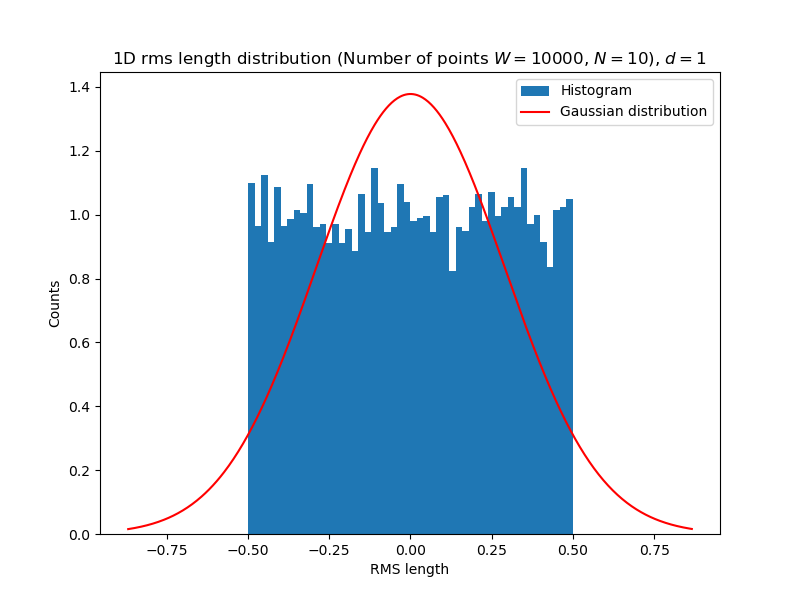

In [215]:
distribution = many_random_walk(N=1, dim=1, num_point=10000)
plot_1D_rms_histogram(distribution)

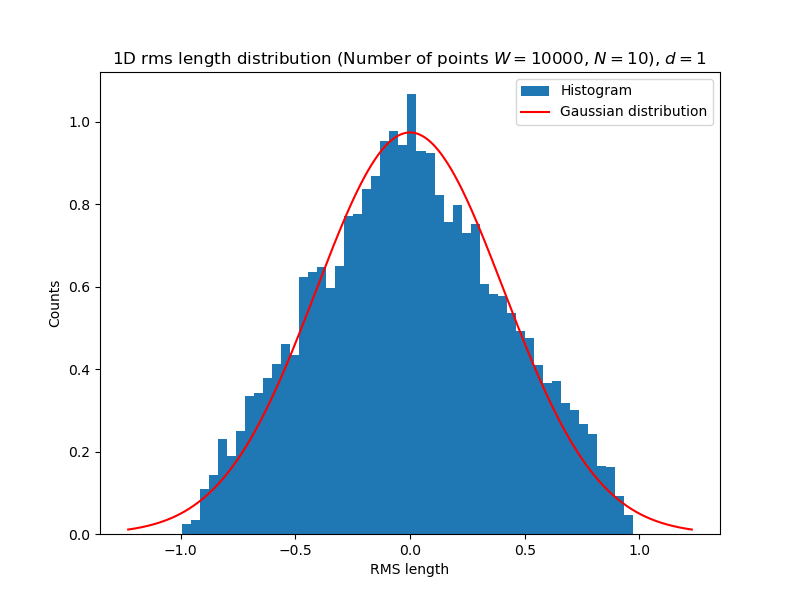

In [216]:
distribution = many_random_walk(N=2, dim=1, num_point=10000)
plot_1D_rms_histogram(distribution)

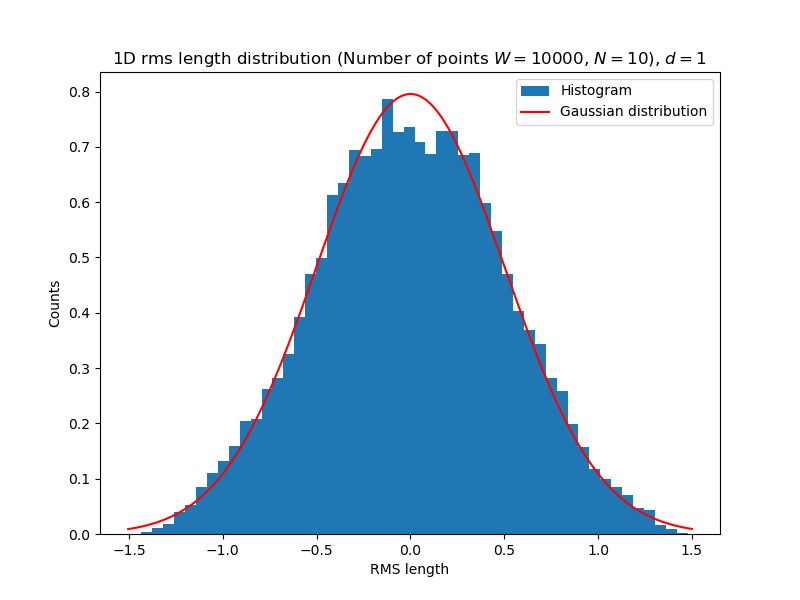

In [217]:
distribution = many_random_walk(N=3, dim=1, num_point=10000)
plot_1D_rms_histogram(distribution)

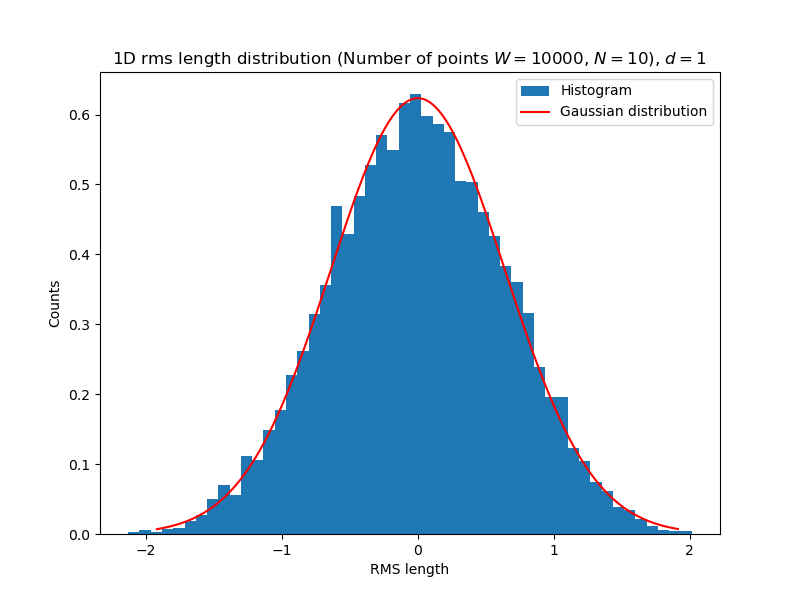

In [218]:
distribution = many_random_walk(N=5, dim=1, num_point=10000)
plot_1D_rms_histogram(distribution)